## ***Pull faces from an image***

<br/>

*This example program shows how to find frontal human faces in an image. In particular, it shows how you can take a list of images from the command
line and display each on the screen with red boxes overlaid on each human face.*
<br/>
<br/>

In [ ]:
! git clone https://github.com/ArupDutta/face_detector_pull_faces_from_image

In [21]:
from PIL import Image
from PIL import ImageFile
import numpy as np
import random
import dlib
import os

import matplotlib.pyplot as plt

*The face detector is made using the now classic Histogram of Oriented Gradients (HOG) feature combined with a linear classifier, an image
pyramid, and sliding window detection scheme. This type of object detector is fairly general and capable of detecting many types of semi-rigid 
objects in addition to human faces.*

In [22]:
detector = dlib.get_frontal_face_detector()

*loop through the detector object (faces) to get each face locations or dimensions. Return a list with face dimensions*

In [23]:
def get_img_locations(dets):
  img_lst=[]

  for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(i, d.left(), d.top(), d.right(), d.bottom()))
    dim = (d.left(), d.top(), d.right(), d.bottom())
    img_lst.append(dim)
  
  return img_lst

*Return an image pil object from its dimensions*

In [24]:
def construct_image(img_loc, img_arr):

  left, top, right, bottom = img_loc
  face_image = img_arr[top:bottom, left:right]
  pil_img = Image.fromarray(face_image)
  
  return pil_img


*Loop through each image from folder, detects faces, save into another folder*

Processing file: img1.jpg
Number of faces detected: 5
Detection 0: Left: 397 Top: 325 Right: 526 Bottom: 454
Detection 1: Left: 533 Top: 271 Right: 641 Bottom: 378
Detection 2: Left: 225 Top: 368 Right: 354 Bottom: 497
Detection 3: Left: 43 Top: 192 Right: 266 Bottom: 415
Detection 4: Left: 273 Top: 274 Right: 309 Bottom: 310
[(397, 325, 526, 454), (533, 271, 641, 378), (225, 368, 354, 497), (43, 192, 266, 415), (273, 274, 309, 310)]


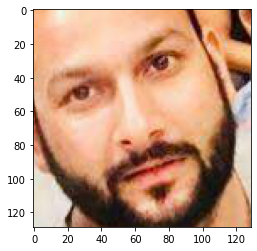

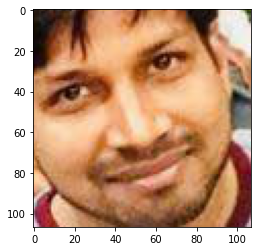

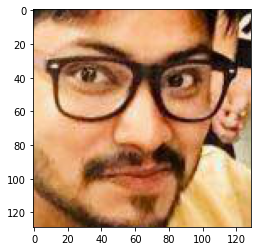

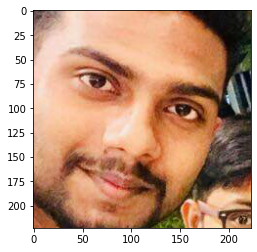

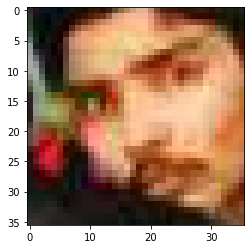

Processing file: img4.jpg
Number of faces detected: 4
Detection 0: Left: 913 Top: 451 Right: 1375 Bottom: 913
Detection 1: Left: 669 Top: 348 Right: 990 Bottom: 669
Detection 2: Left: 290 Top: 290 Right: 675 Bottom: 675
Detection 3: Left: 1189 Top: 6 Right: 1225 Bottom: 42
[(913, 451, 1375, 913), (669, 348, 990, 669), (290, 290, 675, 675), (1189, 6, 1225, 42)]


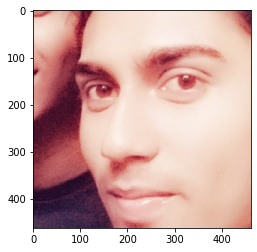

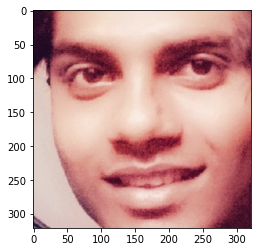

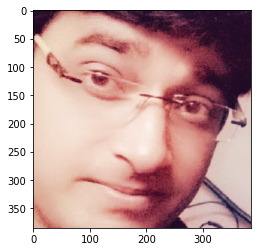

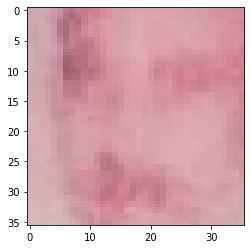

In [29]:
img_path = "./img/"
i=0
for file in os.listdir(img_path):
  print("Processing file: {}".format(file))

  #img_arr = dlib.load_rgb_image(img_path + file)
  im = Image.open(img_path + file)
  img_arr = np.asarray(im)
  
  dets = detector(img_arr, 1)
  print("Number of faces detected: {}".format(len(dets)))

  image_locations = get_img_locations(dets)
  print(image_locations)

  j=0
  for img_loc in image_locations:
    pil_img=construct_image(img_loc,img_arr)
    plt.imshow(pil_img)
    plt.show()

    pil_img.save('./pulled_img/' + 'file'+ str(j) + str(j) + '.jpg')
    j=j+1
    
  i=i+1